In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
import math 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
# let us create a function of parabola - > y = ax2 + bx + c
# As y is our target vcariable and x is feature, we make sure that the target is a quadratic function of feature and see
# if linear regression can capture it. 
a = 3
b = 4
c = 5

def quadratic(x1, x2):
    return ((a*(pow(x1,2))) + (b*x2) + c)
    
    
df = pd.DataFrame()

df['X1'] = np.arange(0,100, 0.5)
df['X2'] = np.arange(-60,40, 0.5)

df['y'] = df.apply(lambda x: quadratic(x.X1, x.X2), axis=1)


In [37]:
df.head()

,X1,X2,y
0,0.0,-60.0,-235.00
1,0.5,-59.5,-232.25
2,1.0,-59.0,-228.00
3,1.5,-58.5,-222.25
4,2.0,-58.0,-215.00


In [38]:
X = df[['X1','X2']]
y = df['y']

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([151.10332591, 151.10332591])

In [50]:
model.intercept_

4048.187540017566

In [45]:
y_pred = model.predict(X_test)

In [46]:
# Let us check the accuracy of our prediction. 
print('mean_absolute_error {}'.format(mean_absolute_error(y_pred,y_test)))
print('mean_squared_error {}'.format(mean_squared_error(y_pred,y_test, squared=False)))
print('r2_score {}'.format(r2_score(y_pred,y_test)))

mean_absolute_error 1801.5295943510046
mean_squared_error 1964.2741491735565
r2_score 0.9362130887670919


Text(0, 0.5, 'actual')

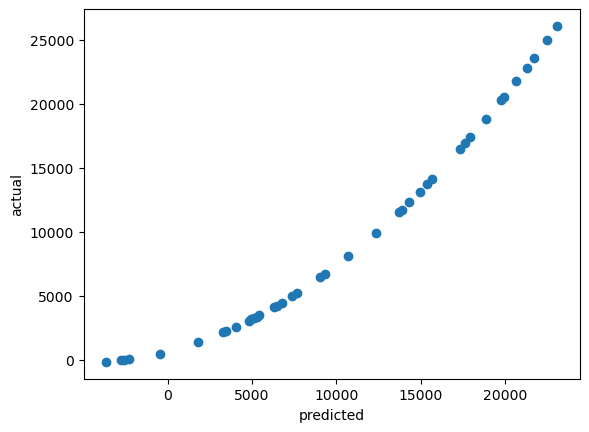

In [47]:
# let us visualize the error
plt.scatter(y_pred,y_test)
plt.xlabel('predicted')
plt.ylabel('actual')

In [53]:
# let us do some feature engineering and increase the power of feature X
df['X3'] = df['X1'].apply(lambda x: pow(x,2))

In [54]:
df.head()

,X1,X2,y,X_3,X3
0,0.0,-60.0,-235.00,0.00,0.00
1,0.5,-59.5,-232.25,0.25,0.25
2,1.0,-59.0,-228.00,1.00,1.00
3,1.5,-58.5,-222.25,2.25,2.25
4,2.0,-58.0,-215.00,4.00,4.00


In [55]:
X = df[['X3','X2']]
y = df['y']

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
model.coef_

array([3., 4.])

In [61]:
model.intercept_

5.000000000003638

In [58]:
y_pred = model.predict(X_test)

In [59]:
print('mean_absolute_error {}'.format(mean_absolute_error(y_pred,y_test)))
print('mean_squared_error {}'.format(mean_squared_error(y_pred,y_test, squared=False)))
print('r2_score {}'.format(r2_score(y_pred,y_test)))

mean_absolute_error 2.7404745139847364e-12
mean_squared_error 3.34516325635563e-12
r2_score 1.0


Text(0, 0.5, 'actual')

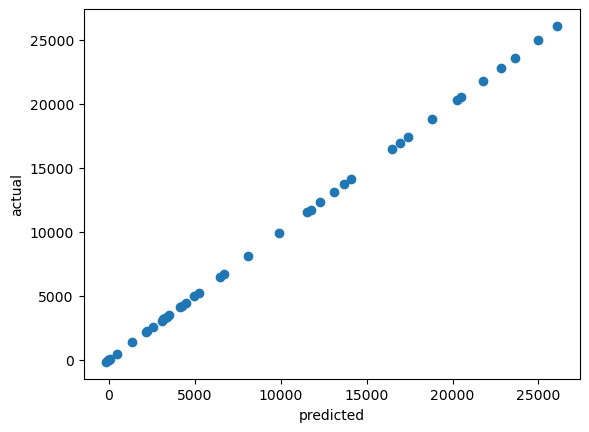

In [63]:
# let us visualize the error
plt.scatter(y_pred,y_test)
plt.xlabel('predicted')
plt.ylabel('actual')

In [64]:
# As we can clearly see the moment we have squared the first feature, linear regression can perfectly predict the
# values of the co-efficients. Which means linear regression models are not suitable for non linear functions.
# If you have a non linear data you may have to do some feature engineering and change the feature values using
# non linear transformation.